In [1]:
from ipywidgets import interact, fixed, interactive, widgets, interact_manual
from IPython.display import display, clear_output

import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

import effPlotwidget as effplt
reload(effplt)
effplt.defaultWidgets()

import plotting as plotting

Welcome to ROOTaaS 6.06/08


In [2]:
w = interactive(effplt.GetDictionary,inputDir=effplt.widgetparams['w_inputDir'])
display(w)
#extract the dictionary with the classifier names found in the
#given directory plus the directory name
class_dict = w.result[0]
inDir = w.result[1]

fitterObject = interactive(effplt.GetFitter,
                           inputName=class_dict,
                            dataDir =effplt.widgetparams['w_dataDir'],
                            inputDir=fixed(inDir),
                            load = effplt.widgetparams['w_Load']
                          )

display(fitterObject)

entered config files named my_train_config
None
Load object with the name Train_Configurable_Refactor_higgs_model_dep_1735132 and the following paramters 
./classifiers
./classifiers/Train_Configurable_Refactor_higgs_model_dep_1735132.pkl.gz
loading pickle ./classifiers/Train_Configurable_Refactor_higgs_model_dep_1735132.pkl.gz
loading data ./classifiers/Train_Configurable_Refactor_higgs_model_dep_1735132.root
Index([u'absweight', u'class', u'genJet2p5Pt0', u'genJet2p5Pt1',
       u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Rapidity0',
       u'genJet2p5Rapidity1', u'genJet2p5Rapidity2', u'genJet2p5Rapidity3',
       u'genNjets2p5', u'genPt', u'genRapidity', u'recoNjets2p5', u'recoPt',
       u'recoRapidity', u'weight', u'proc', u'absGenRapidity',
       u'absGenJet2p5Rapidity0', u'absGenJet2p5Rapidity1',
       u'absGenJet2p5Rapidity2', u'absGenJet2p5Rapidity3', u'recoPtBin',
       u'recoPtCat', u'recoNjets2p5Bin', u'recoNjets2p5Cat', u'class_prob_0',
       u'class_prob_1', u'class

In [14]:
first_train_evt = int(round(df.index.size*(1.-fitterObject.result.split_frac)))
#take the test sample 
df_test = df[:first_train_evt]

In [15]:
def GetProdProcName (n) :
    if (n==0) :
        return 'ggF'
    if (n==1) :
        return 'ttH'
    if (n==2) :
        return 'VBF'
    if (n==3) :
        return 'VH'
    

In [16]:
class_list = ['class']#,'recoPt','recoNjets2p5']


There are 4 features of type class
['class_prob_0', 'class_prob_1', 'class_prob_2', 'class_prob_3']
There are 4 features of type class
['class_prob_0', 'class_prob_1', 'class_prob_2', 'class_prob_3']
There are 4 features of type class
['class_prob_0', 'class_prob_1', 'class_prob_2', 'class_prob_3']
There are 4 features of type class
['class_prob_0', 'class_prob_1', 'class_prob_2', 'class_prob_3']


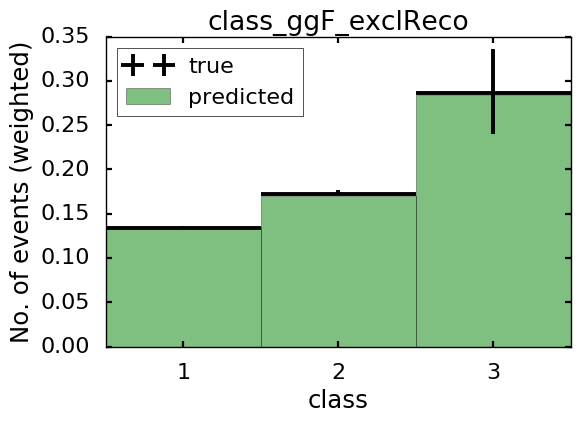

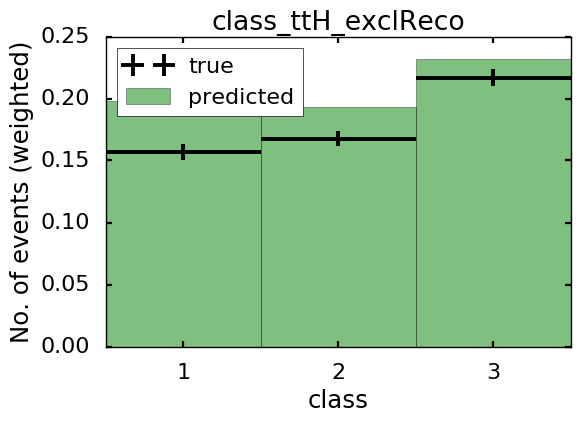

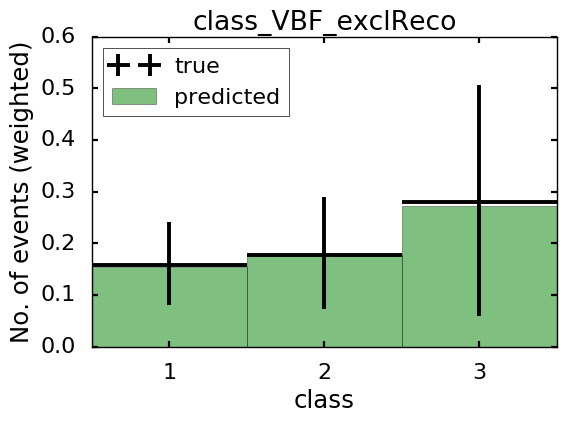

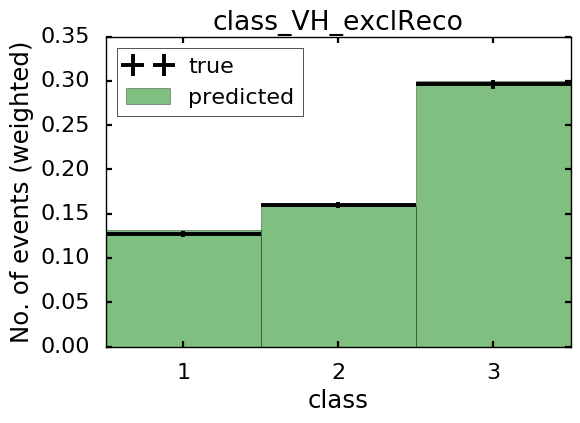

In [17]:
for cl in class_list :
    for prod_mech in xrange(4) :
        plotting.naive_closure(df_test[df_test['proc']==prod_mech],
                               column = cl, logy=False, absolute=False,first=1,
                       savepath='./plots/totEffperCat',title=cl+'_'+GetProdProcName(prod_mech)+'_exclReco')

In [13]:
reload(plotting)

<module 'plotting' from 'plotting.py'>

There are 16 features of type recoNjets2p5Cat
['recoNjets2p5Cat_prob_0', 'recoNjets2p5Cat_prob_1', 'recoNjets2p5Cat_prob_2', 'recoNjets2p5Cat_prob_3', 'recoNjets2p5Cat_prob_4', 'recoNjets2p5Cat_prob_5', 'recoNjets2p5Cat_prob_6', 'recoNjets2p5Cat_prob_7', 'recoNjets2p5Cat_prob_8', 'recoNjets2p5Cat_prob_9', 'recoNjets2p5Cat_prob_10', 'recoNjets2p5Cat_prob_11', 'recoNjets2p5Cat_prob_12', 'recoNjets2p5Cat_prob_13', 'recoNjets2p5Cat_prob_14', 'recoNjets2p5Cat_prob_15']


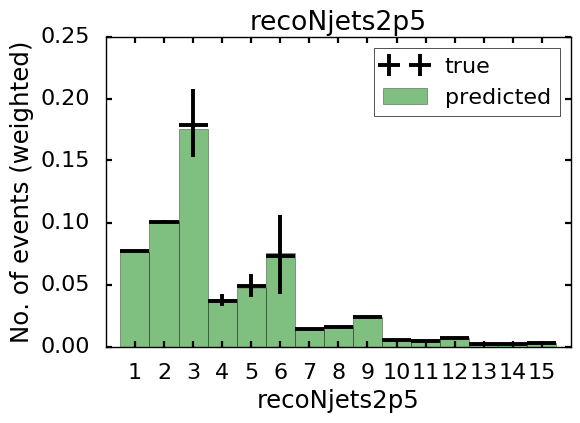

In [16]:
plotting.naive_closure(df_test,'recoNjets2p5',logy=False,absolute=False,first=1,
                       title='recoNjets2p5')

In [35]:
import numpy as np

number of weights in the process ttH: 48628
number of weights in the process VBF: 170897
number of weights in the process VH: 33723


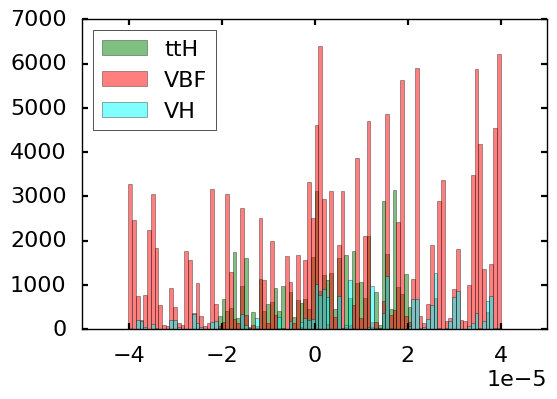

In [44]:
colors = ['green','red','cyan']
for prodmech in np.arange(1,4,1) :
    print('number of weights in the process '+ GetProdProcName(prodmech) + ': ' +
          str(len(df_test[df_test['proc']==prodmech]['weight'])))
    plt.hist(df_test[df_test['proc']==prodmech]['weight'],bins=100,label=GetProdProcName(prodmech),range=[-4e-5,4e-5]
            ,alpha=.5,color=colors[prodmech-1])
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(loc='best')
plt.show()

572356
194483
681694
135354


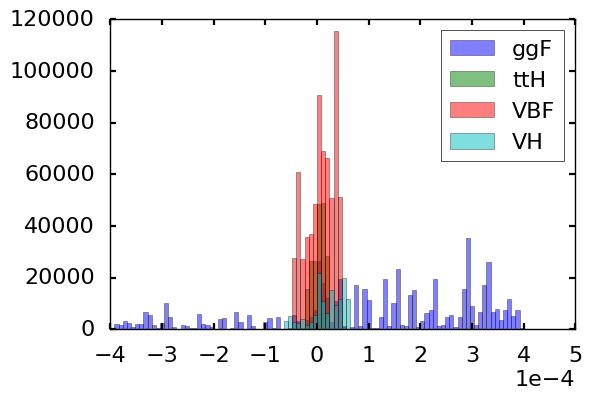

In [30]:
for prodmech in xrange(4) :
    print(len(df[df['proc']==prodmech]['weight']))
    plt.hist(df[df['proc']==prodmech]['weight'],bins=100,label=GetProdProcName(prodmech),range=[-4e-4,4e-4]
            ,alpha=.5)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(loc='best')
plt.show()